<a href="https://colab.research.google.com/github/guramritpalsaggu/cellular_Image_Classification/blob/master/Cellular_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/train_mapped.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall("/content/train") 
    print('Done!') 

In [0]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "/content/drive/My Drive/test.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall("/content/test") 
    print('Done!') 

In [0]:
from fastai.vision import *

In [0]:
path = '/content/train/train_mapped'
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9']

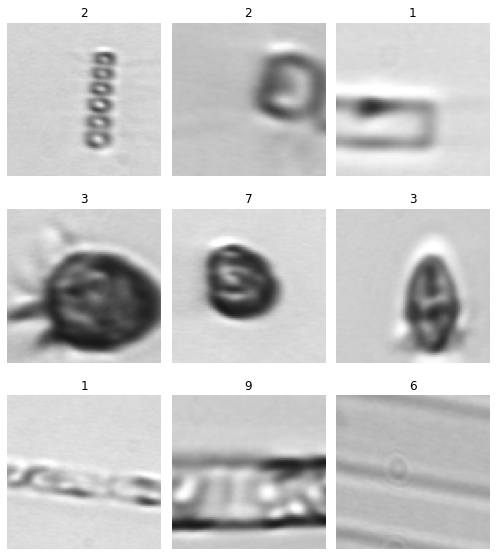

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9'],
 14,
 8480,
 2120)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 53.8MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.561137,0.758411,0.253774,03:05
1,0.966439,0.543468,0.189151,03:06
2,0.778680,0.495569,0.170755,03:05
3,0.707986,0.451741,0.160849,03:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


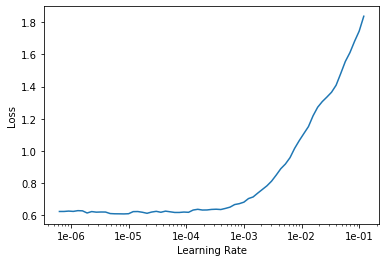

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(50, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.581181,0.397405,0.133962,02:59
1,0.598087,0.393514,0.140566,03:02
2,0.599101,0.388439,0.132547,02:57
3,0.582744,0.385052,0.131132,02:55
4,0.549738,0.381174,0.133491,02:58
5,0.534641,0.371392,0.127358,02:59
6,0.544397,0.365536,0.122170,02:58
7,0.513099,0.353107,0.121698,03:08
8,0.484592,0.344947,0.116981,03:09
9,0.487283,0.343620,0.117453,03:05


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

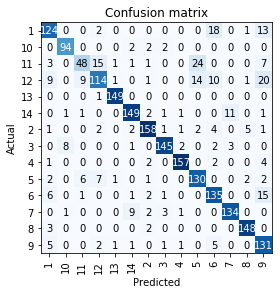

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=2)

[('11', '5', 24),
 ('12', '9', 20),
 ('1', '6', 18),
 ('11', '12', 15),
 ('6', '9', 15),
 ('12', '5', 14),
 ('1', '9', 13),
 ('14', '7', 11),
 ('12', '6', 10),
 ('12', '1', 9),
 ('12', '11', 9),
 ('7', '14', 9),
 ('3', '10', 8),
 ('11', '9', 7),
 ('5', '12', 7),
 ('5', '11', 6),
 ('6', '1', 6),
 ('2', '8', 5),
 ('9', '1', 5),
 ('9', '6', 5),
 ('2', '6', 4),
 ('4', '9', 4),
 ('11', '1', 3),
 ('3', '7', 3),
 ('7', '3', 3),
 ('8', '1', 3),
 ('1', '12', 2),
 ('10', '14', 2),
 ('10', '2', 2),
 ('10', '3', 2),
 ('14', '2', 2),
 ('2', '12', 2),
 ('2', '14', 2),
 ('2', '5', 2),
 ('3', '4', 2),
 ('3', '6', 2),
 ('4', '2', 2),
 ('4', '6', 2),
 ('5', '1', 2),
 ('5', '8', 2),
 ('5', '9', 2),
 ('6', '2', 2),
 ('7', '2', 2),
 ('8', '2', 2),
 ('9', '12', 2)]

In [0]:
learn.unfreeze()

In [0]:
import os
import cv2
preditctions = []
name = []
for i in os.listdir("/content/test"):
    img = plt.imread("/content/test/" + i)
    img = pil2tensor(img, dtype = np.float32)
    preditctions.append(learn.predict(Image(img)))
    name.append(i)

In [0]:
import re
def func(s):
    temp = re.findall(r'\d+', s)
    return temp
namesc = []
for i in name:
    namesc.append(func(i))

In [0]:
pred = pd.DataFrame(preditctions)
names = pd.DataFrame(namesc)
final = pd.concat([pred, names], axis = 1)

In [0]:
final.to_csv('vista.csv')